In [ ]:
!mkdir rabbits
!mkdir crop


mkdir: cannot create directory ‘rabbits’: File exists
mkdir: cannot create directory ‘crop’: File exists


In [ ]:
%cd crop
!unzip crop.zip
%cd ..


In [ ]:
!rm -rf /content/crop/crop.zip

In [ ]:
!ls /content/crop/crop | wc -l #1007

1054


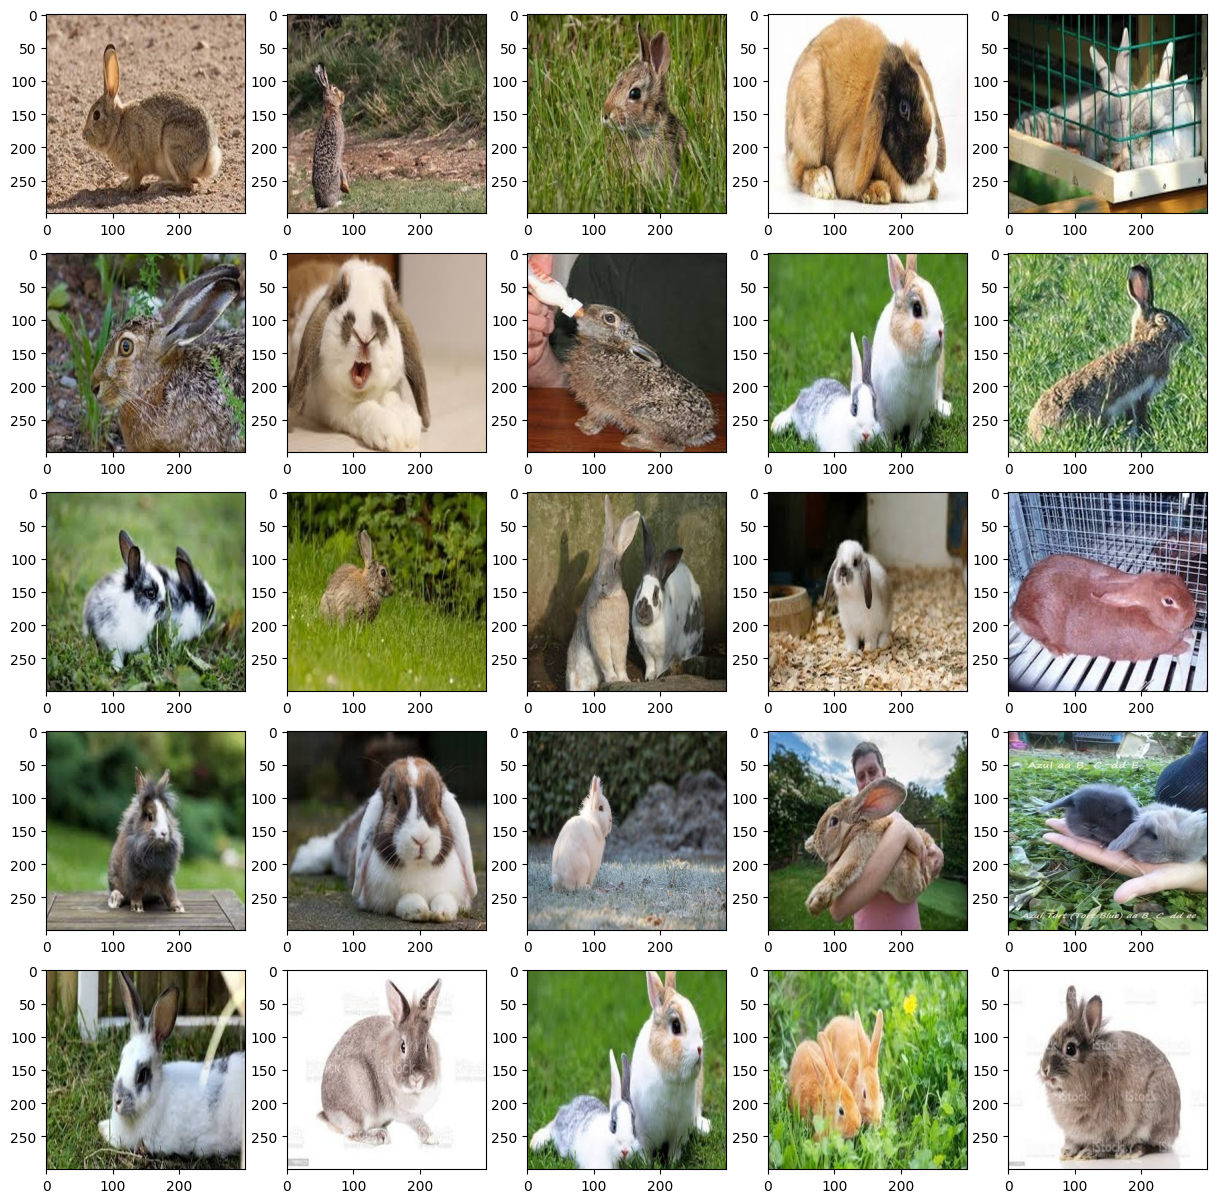

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(15,15))

carpeta = '/content/rabbits/rabbit'
imagenes = os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
  plt.subplot(5,5,i+1)
  imagen = mpimg.imread(carpeta + '/' + nombreimg)
  plt.imshow(imagen)

In [ ]:
!rm -rf /content/dataset/Crop

In [ ]:
#Crear carpetas para hacer el set de datos

!mkdir dataset
!mkdir dataset/Rabbit
!mkdir dataset/Crop

mkdir: cannot create directory ‘dataset’: File exists
mkdir: cannot create directory ‘dataset/Rabbit’: File exists


In [ ]:
import shutil
carpeta_fuente = '/content/rabbits/rabbit'
carpeta_destino = '/content/dataset/Rabbit'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  #Copia de la carpeta fuente a la destino
  shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/crop/crop'
carpeta_destino = '/content/dataset/Crop'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 1007:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/dogs/dog'
carpeta_destino = '/content/dataset/Crop'

imagenes = os.listdir(carpeta_fuente)

for i, nombreimg in enumerate(imagenes):
  if i < 1007:
    #Copia de la carpeta fuente a la destino
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
!ls /content/dataset/Crop | wc -l
!ls /content/dataset/Rabbit | wc -l

1007
1007


Found 4000 images belonging to 5 classes.
Found 1035 images belonging to 5 classes.


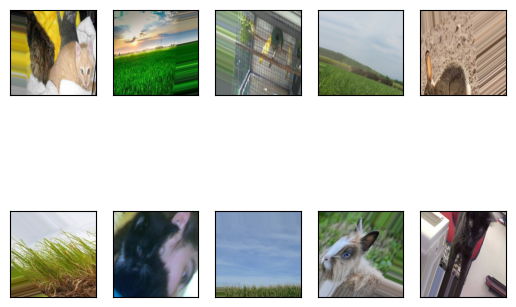

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

#Crear el dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range = 30,
    width_shift_range = 0.25,
    height_shift_range = 0.25,
    shear_range = 15,
    zoom_range = [0.5, 1.5],
    validation_split=0.2056 #20% para pruebas
)

#Generadores para sets de entrenamiento y pruebas
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),
                                                     batch_size=32, shuffle=True, subset='validation')

#Imprimir 10 imagenes del generador de entrenamiento
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()


In [ ]:
import tensorflow as tf

modeloCNN = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
 tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
modeloCNN.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
modeloCNN.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 10, 10, 128)    

In [ ]:
EPOCAS = 100
import math
historial = modeloCNN.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/100
125/125 [==============================] - 24s 180ms/step - loss: 1.3389 - accuracy: 0.3808 - val_loss: 1.1953 - val_accuracy: 0.4174
Epoch 2/100
125/125 [==============================] - 22s 179ms/step - loss: 1.1809 - accuracy: 0.4678 - val_loss: 1.0843 - val_accuracy: 0.4928
Epoch 3/100
125/125 [==============================] - 24s 189ms/step - loss: 1.1199 - accuracy: 0.4958 - val_loss: 1.0932 - val_accuracy: 0.4908
Epoch 4/100
125/125 [==============================] - 23s 184ms/step - loss: 1.0994 - accuracy: 0.5160 - val_loss: 1.0032 - val_accuracy: 0.5536
Epoch 5/100
125/125 [==============================] - 23s 183ms/step - loss: 1.0513 - accuracy: 0.5345 - val_loss: 1.0238 - val_accuracy: 0.5295
Epoch 6/100
125/125 [==============================] - 23s 181ms/step - loss: 1.0520 - accuracy: 0.5455 - val_loss: 1.0345 - val_accuracy: 0.5304
Epoch 7/100
125/125 [==============================] - 23s 181ms/step - loss: 1.0326 - accuracy: 0.5485 - val_loss: 0.9802 -

In [ ]:
modeloCNN.save('/content/modelo1.h5')

In [ ]:
modelo = tf.keras.models.load_model('/content/modelo1.h5')

In [ ]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
EPOCAS_2 = 60
import math

historial2 = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS_2, batch_size=32,
    validation_data=data_gen_pruebas
)

In [ ]:
modelo.save('/content/modelo2.h5')

In [ ]:
modelFinal = tf.keras.models.load_model('/content/modelo2.h5')

In [ ]:
modelFinal.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
historial3 = m.fit(
    data_gen_entrenamiento, epochs=50, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/50
125/125 [==============================] - 71s 534ms/step - loss: 0.4685 - accuracy: 0.8482 - val_loss: 0.2301 - val_accuracy: 0.9304
Epoch 2/50
125/125 [==============================] - 65s 524ms/step - loss: 0.2128 - accuracy: 0.9362 - val_loss: 0.1778 - val_accuracy: 0.9459
Epoch 3/50
125/125 [==============================] - 64s 515ms/step - loss: 0.1730 - accuracy: 0.9427 - val_loss: 0.1673 - val_accuracy: 0.9430
Epoch 4/50
125/125 [==============================] - 67s 536ms/step - loss: 0.1773 - accuracy: 0.9417 - val_loss: 0.1486 - val_accuracy: 0.9565
Epoch 5/50
125/125 [==============================] - 64s 514ms/step - loss: 0.1488 - accuracy: 0.9482 - val_loss: 0.1894 - val_accuracy: 0.9362
Epoch 6/50
125/125 [==============================] - 72s 574ms/step - loss: 0.1429 - accuracy: 0.9498 - val_loss: 0.1511 - val_accuracy: 0.9507
Epoch 7/50
125/125 [==============================] - 68s 544ms/step - loss: 0.1430 - accuracy: 0.9528 - val_loss: 0.1377 - val_ac

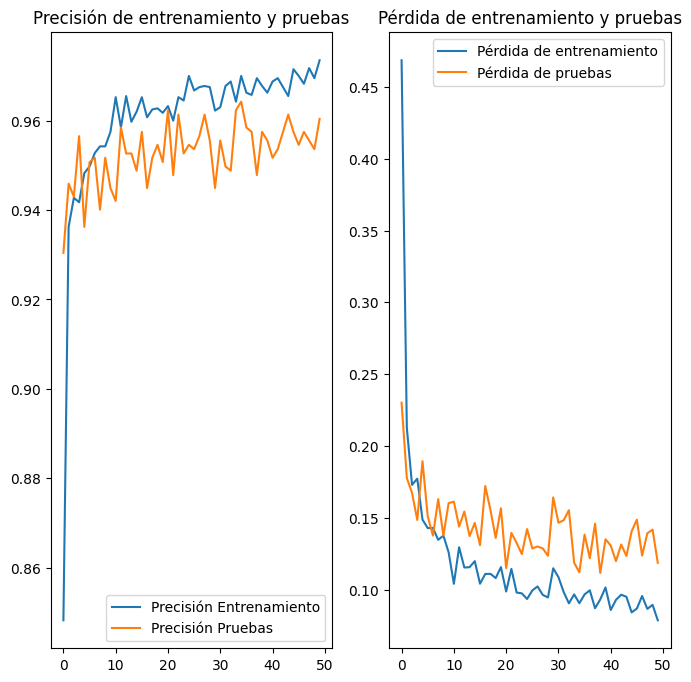

In [ ]:
#Graficas de precisión
acc = historial3.history['accuracy']
val_acc = historial3.history['val_accuracy']

loss = historial3.history['loss']
val_loss = historial3.history['val_loss']

rango_epocas = range(50)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

In [ ]:
m.save('/content/modelo_Final.h5')


In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelFinal.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)


In [ ]:
#0 = Bird, 1 = Cat  2 = Crop , 3 = Dog 4 = Rabbirt,
url = 'https://thumb.mp-farm.com/69018651/preview.jpg'
prediccion = categorizar (url)
print(prediccion)
if(int(prediccion)==0):
  print("Bird")
if(int(prediccion)==1):
  print("Cat")
if(int(prediccion)==2):
  print("Crop")
if(int(prediccion)==3):
  print("Dog")
if(int(prediccion)==4):
  print("Rabbit")

1/1 [==============================] - 0s 80ms/step
1
Cat
